# Movimento de um projétil sem resistência do ar

Gessé de Castro Adam e Clóvis Caetano

Última edição: 26 de junho de 2024

In [10]:
# Carregando bibliotecas que serão usadas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Teoria

Se a resistência do ar não for considerada, a única força que atua sobre o projétil é a força da gravidade:

$$
\vec{F}_{\text{res}} = -mg\hat{y}.
$$

Então o projétil só tem aceleração na direção vertical:

$$
\left\{
\begin{align*}
a_x &= 0\\
a_y &= -g.
\end{align*}
\right.
$$

Nesse caso, a trajetória do projétil é uma parábola:

$$
y = y_0 + A(x-x_0) + B(x-x_0)^2,
$$

onde

$$
A = \tan\theta_0 \quad\textrm{e}\quad B = {\displaystyle -\frac{g}{2v_0^2\cos^2\theta_0}}.
$$

## Implementação

In [11]:
def aceleracao(x, y, vx, vy):
    """
    Função que calcula a aceleração do projétil. 
    Obs.: mesmo a aceleração sendo constante neste caso, foi mantido o mesmo
    padrão que será usado nos próximos notebooks.
    """
    ax = 0
    ay = -g
    return ax, ay

In [12]:
def func_analitica(x):
    """
    Funão que calcula a trajetória analítica do projétil.
    """
    A = np.tan(theta0_rad)
    B = -g/(2*v0**2*(np.cos(theta0_rad))**2)
    return y0 + A*(x-x0) + B*(x-x0)**2

In [13]:
# Métodos numéricos

def euler(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx*dt
    y_novo = y + vy*dt
    return x_novo, y_novo, vx_novo, vy_novo

def euler_cromer(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Euler-Cromer.
    """
    ax, ay = aceleracao(x, y, vx, vy)
    vx_novo = vx + ax*dt 
    vy_novo = vy + ay*dt
    x_novo = x + vx_novo*dt
    y_novo = y + vy_novo*dt
    return x_novo, y_novo, vx_novo, vy_novo

def heun(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de Heun.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)
    vx1 = vx + ax1*dt
    vy1 = vy + ay1*dt
    x1 = x + vx*dt
    y1 = y + vy*dt
    ax2, ay2 = aceleracao(x1, y1, vx1, vy1)
    vx2 = vx + ax2*dt
    vy2 = vy + ay2*dt
    x2 = x + vx1*dt
    y2 = y + vy1*dt
    x_novo = (x1 + x2)/2
    y_novo = (y1 + y2)/2
    vx_novo = (vx1 + vx2)/2
    vy_novo = (vy1 + vy2)/2
    return x_novo, y_novo, vx_novo, vy_novo

def runge_kutta(x, y, vx, vy):
    """
    Atualiza a posição e a velocidade do projétil com o método de 
    Runge-Kutta de 4ª ordem.
    """
    ax1, ay1 = aceleracao(x, y, vx, vy)  
    k1vx = ax1*dt
    k1vy = ay1*dt
    k1x = vx*dt
    k1y = vy*dt
    ax2, ay2 = aceleracao(x+k1x/2, y+k1y/2, vx+k1vx/2, vy+k1vy/2)  
    k2vx = ax2*dt
    k2vy = ay2*dt
    k2x = (vx+k1vx/2)*dt
    k2y = (vy+k1vy/2)*dt
    ax3, ay3 = aceleracao(x+k2x/2, y+k2y/2, vx+k2vx/2, vy+k2vy/2)  
    k3vx = ax3*dt
    k3vy = ay3*dt
    k3x = (vx+k2vx/2)*dt
    k3y = (vy+k2vy/2)*dt
    ax4, ay4 = aceleracao(x+k3x, y+k3y, vx+k3vx, vy+k3vy)  
    k4vx = ax4*dt
    k4vy = ay4*dt
    k4x = (vx+k3vx)*dt
    k4y = (vy+k3vy)*dt
    x_novo = x + 1/6*(k1x + 2*k2x + 2*k3x + k4x) 
    y_novo = y + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
    vx_novo = vx + 1/6*(k1vx + 2*k2vx + 2*k3vx + k4vx)
    vy_novo = vy + 1/6*(k1vy + 2*k2vy + 2*k3vy + k4vy)
    return x_novo, y_novo, vx_novo, vy_novo

In [14]:
def trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min):
    """
    Função para calcular as coordenadas e as componentes da velocidade do projétil
    """
    # Usando as condições iniciais
    t = t0
    x = x0
    y = y0
    vx = vx0
    vy = vy0

    # Criando listas para armazenar os valores calculados
    t_salvo = np.array([t])
    x_salvo = np.array([x])
    y_salvo = np.array([y])
    vx_salvo = np.array([vx])
    vy_salvo = np.array([vy])

    # Atualizando os valores das variáveis
    while t < t_max:
        t = t + dt
        x, y, vx, vy = metodo(x, y, vx, vy)
        t_salvo = np.append(t_salvo, t)
        x_salvo = np.append(x_salvo, x)
        y_salvo = np.append(y_salvo, y)
        vx_salvo = np.append(vx_salvo, vx)
        vy_salvo = np.append(vy_salvo, vy)  
        if y < y_min:
            break
    
    return t_salvo, x_salvo, y_salvo, vx_salvo, vy_salvo

In [19]:
# Constantes físicas
g = 9.81 # Aceleração da gravidade em m/s^2

In [20]:
# Condições iniciais
t0 = 0
x0 = 0
y0 = 0
v0 = 1640 
theta0 = 45
theta0_rad = np.deg2rad(theta0)
vx0 = v0*np.cos(theta0_rad)
vy0 = v0*np.sin(theta0_rad)

# Condições de parada
t_max = 10*60
y_min = 0 

# Incremento no tempo
dt = 10

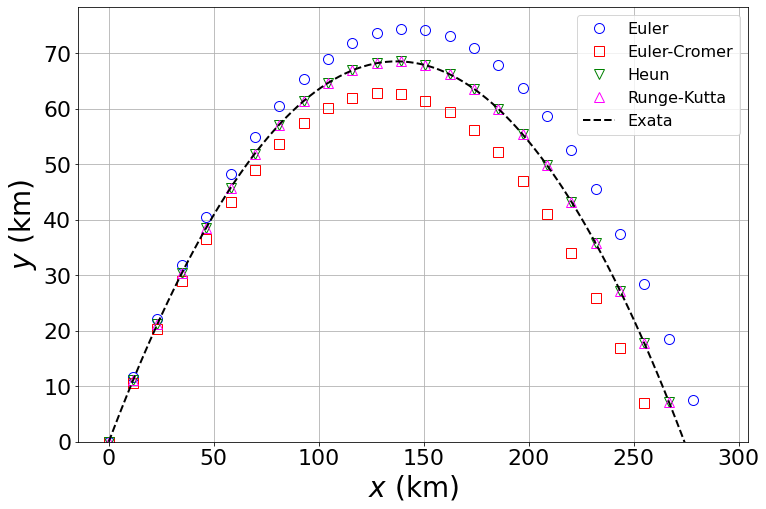

In [21]:
# Desenhando a trajetória do projétil com o uso de cada 
# método numérico (símbolos) e comparando com a trajetória analítica (linhas)

fig,ax = plt.subplots()
ax.figure.set_size_inches(12, 8)

metodo = euler
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'o', markersize=10, markeredgecolor='blue', markerfacecolor="None", label='Euler')

metodo = euler_cromer
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 's', markersize=10, markeredgecolor='red', markerfacecolor="None", label='Euler-Cromer')

metodo = heun
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, 'v', markersize=10, markeredgecolor='green',  markerfacecolor="None", label='Heun')

metodo = runge_kutta
t, x, y, vx, vy = trajetoria(metodo, x0, y0, vx0, vy0, t0, t_max, y_min)
ax.plot(x, y, '^', markersize=10, markeredgecolor='magenta',  markerfacecolor="None", label='Runge-Kutta')

x = np.linspace(x0, max(x), 100)
y = func_analitica(x)
ax.plot(x, y, 'k--', linewidth=2, label='Exata')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e3)))
ax.set_xlabel('$x$ (km)', size=28)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y/1e3)))
ax.set_ylabel('$y$ (km)', size=28)
ax.set_ylim(bottom=0)
ax.tick_params(labelsize=22)
ax.legend(fontsize=16)
ax.grid()

fig.savefig("Resultado1.png", dpi=300, facecolor='white', bbox_inches='tight')

Notamos que os métodos de Euler e Euler-Cromer apresentam um erro maior que os demais. O método de Heun (Euler melhorado) apresenta resultados semelhantes ao de Runge-Kutta. Mesmo o método de Runge-Kutta sendo mais empregado em trabalhos de análise numérica, nos demais notebooks empregaremos apenas o métode de Heun, por ser de mais fácil dedução, o que pode ser interessante do ponto de vista didático.